In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_Anaheim_multi_class

In [2]:
numNodes = Compute_Jacobian_Anaheim_multi_class.numNodes;
numLinks = Compute_Jacobian_Anaheim_multi_class.numLinks;
numODpairs = Compute_Jacobian_Anaheim_multi_class.numODpairs;
numZones = Compute_Jacobian_Anaheim_multi_class.numZones;
od_pairs = Compute_Jacobian_Anaheim_multi_class.od_pairs;
link_list_js = Compute_Jacobian_Anaheim_multi_class.link_list_js;
link_length_list = Compute_Jacobian_Anaheim_multi_class.link_length_list;

In [3]:
include("../Julia_files/initia_data.jl");
include("prepare_data_Anaheim.jl");
include("extract_data_Anaheim.jl");
include("../Julia_files/tap_MSA_multi_class.jl");
include("../Julia_files/inverseVI_multi_class.jl");
include("../Julia_files/demands_adjustment_gradi_multi_class.jl");

In [4]:
demandsDictCar[0] = demandsDict[0]["car"]
demandsDictCar[1] = demandsDict[1]["car"]
demandsDictTruck[0] = demandsDict[0]["truck"]
demandsDictTruck[1] = demandsDict[1]["truck"]

Dict{Any,Any} with 1444 entries:
  (8,23)  => 0.18601
  (21,13) => 4.76799
  (23,10) => 2.50156
  (30,38) => 27.3171
  (9,34)  => 7.95514
  (12,27) => 0.371041
  (27,32) => 2.09722
  (4,5)   => 136.787
  (18,21) => 12.9933
  (30,21) => 16.4492
  (36,35) => 2.62148
  (37,37) => 0
  (11,32) => 1.09891
  (1,33)  => 15.6124
  (3,38)  => 23.4042
  (6,18)  => 25.9524
  (36,8)  => 0.194566
  (1,22)  => 14.3684
  (24,31) => 2.21776
  (19,26) => 0.767668
  (36,4)  => 10.1183
  (36,25) => 12.482
  (33,33) => 0
  (13,19) => 0.18757
  (7,19)  => 13.7943
  ⋮       => ⋮

In [5]:
demandsDiffDictCar[1] = norm(demandsDicToVec(demandsDictCar[1]) - demandsDicToVec(demandsDictCar[0]))/
norm(demandsDicToVec(demandsDictCar[0]));

demandsDiffDictTruck[1] = norm(demandsDicToVec(demandsDictTruck[1]) - demandsDicToVec(demandsDictTruck[0]))/
norm(demandsDicToVec(demandsDictTruck[0] ));

In [6]:
demandsVecDictCar[0] = demandsDicToVec(demandsDictCar[0]);
demandsVecDictTruck[0] = demandsDicToVec(demandsDictTruck[0]);

In [7]:
demandsVecDictCar

Dict{Any,Any} with 1 entry:
  0 => [1092.72,325.92,689.12,283.52,436.08,345.2,0.8,45.44,60.24,0.8  …  14.88…

In [8]:
demandsVecDictTruck

Dict{Any,Any} with 1 entry:
  0 => [273.18,81.48,172.28,70.88,109.02,86.3,0.2,11.36,15.06,0.2  …  3.72,5.44…

In [9]:
fcoeffs = [1, 0, 0, 0, .15];

# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA_Multi(demandsDictCar[0], demandsDictTruck[0], fcoeffs);

In [10]:
tapFlowDicDict[0]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((71,255),1695.54),Pair{Any,Any}((323,3…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((71,255),426.628),Pair{Any,Any}((323,3…

In [11]:
tapFlowVecDict[0]

2×914 Array{Float64,2}:
 5659.92  7730.0  6135.2  9739.04  2069.44  …  956.96  919.44  310.32  1218.0
 1414.98  1932.5  1533.8  2434.76   517.36     239.24  229.86   77.58   304.5

In [12]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/Anaheim_net.txt", tapFlowDicDict[0]);

In [13]:
arcsDict[0]

Dict{Any,Any} with 914 entries:
  (71,255)  => Arc(71,255,1800.0,0.5,2548.79,1695.54,426.628)
  (323,324) => Arc(323,324,5400.0,0.5,1325.57,883.196,221.186)
  (354,353) => Arc(354,353,5400.0,1.0,0.199,0.0,0.0995)
  (60,230)  => Arc(60,230,9000.0,0.333333,2547.6,1697.67,424.963)
  (223,346) => Arc(223,346,1800.0,0.5,1678.66,1118.62,280.024)
  (147,146) => Arc(147,146,7200.0,0.763321,4091.86,2733.45,679.206)
  (337,33)  => Arc(337,33,12600.0,0.149068,7126.09,4721.31,1202.39)
  (366,365) => Arc(366,365,5400.0,0.5,1231.08,820.727,205.178)
  (390,375) => Arc(390,375,5400.0,2.0,0.02376,0.02376,0.0)
  (315,316) => Arc(315,316,5400.0,2.57992,0.0,0.0,0.0)
  (198,197) => Arc(198,197,7200.0,0.152623,7068.75,4611.41,1228.67)
  (333,334) => Arc(333,334,5400.0,0.420076,1762.54,1175.21,293.663)
  (367,368) => Arc(367,368,5400.0,0.720076,159.766,106.511,26.6276)
  (244,339) => Arc(244,339,1800.0,0.5,2267.03,1509.58,378.724)
  (274,41)  => Arc(274,41,5400.0,1.0,0.0,0.0,0.0)
  (225,330) => Arc(225,330,1

In [14]:
deg = 6
c = 1.5
lam = 0.1

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDictCar[1], demandsDictTruck[1], 
arcsDict[0]);

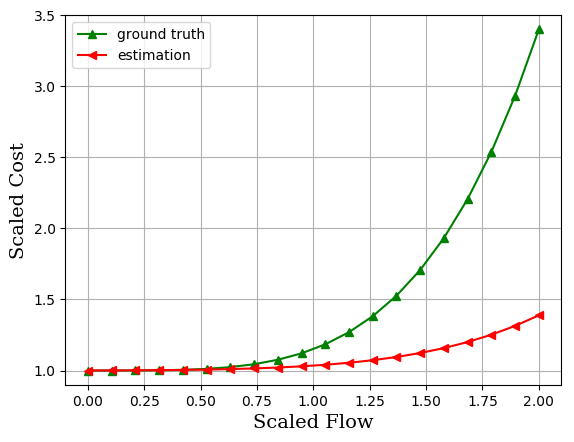

In [15]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

In [16]:
demandsVecDictCar[1] = demandsDicToVec(demandsDictCar[1]);
demandsVecDictTruck[1] = demandsDicToVec(demandsDictTruck[1]);

objFunDict[1] = objF(demandsVecDictCar[1], demandsVecDictTruck[1], coeffs_dict[(deg, c, lam, 1)]);

In [17]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA_Multi(demandsDictCar[1], demandsDictTruck[1], 
coeffs_dict[(deg, c, lam, 1)]);

In [18]:
tapFlowDicDict[1]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((71,255),1891.65),Pair{Any,Any}((323,3…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((71,255),472.921),Pair{Any,Any}((323,3…

In [19]:
tapFlowVecDict[1] 

2×914 Array{Float64,2}:
 5737.03  7999.5   6289.51  9803.83  2077.27   …  891.625  315.771   1222.69 
 1434.26  1999.87  1572.38  2450.96   519.317     222.906   78.9427   305.673

In [20]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/Anaheim_net.txt", tapFlowDicDict[1]);

In [21]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [22]:
linkCostDicDict[1]["car"]

Dict{Any,Any} with 914 entries:
  "1"   => 1.18518
  "519" => 0.420124
  "788" => 1.0
  "774" => 1.42078
  "599" => 1.72745
  "491" => 0.500656
  "228" => 0.500433
  "332" => 0.428085
  "190" => 0.5
  "227" => 0.281341
  "297" => 0.157781
  "605" => 1.08028
  "24"  => 1.00203
  "204" => 0.517814
  "416" => 1.9201
  "23"  => 1.00048
  "160" => 0.333664
  "561" => 0.5
  "859" => 0.500544
  "891" => 1.10642
  "815" => 1.00093
  "253" => 0.280217
  "39"  => 0.151248
  "843" => 0.149498
  "112" => 1.43206
  ⋮     => ⋮

In [23]:
linkCostDicDict[1]["truck"]

Dict{Any,Any} with 914 entries:
  "1"   => 1.3037
  "519" => 0.462136
  "788" => 1.1
  "774" => 1.56286
  "599" => 1.90019
  "491" => 0.550722
  "228" => 0.550476
  "332" => 0.470894
  "190" => 0.55
  "227" => 0.309475
  "297" => 0.173559
  "605" => 1.18831
  "24"  => 1.10223
  "204" => 0.569596
  "416" => 2.11211
  "23"  => 1.10053
  "160" => 0.367031
  "561" => 0.55
  "859" => 0.550599
  "891" => 1.21707
  "815" => 1.10102
  "253" => 0.308238
  "39"  => 0.166373
  "843" => 0.164448
  "112" => 1.57527
  ⋮     => ⋮

In [24]:
link_length_list

914-element Array{Any,1}:
 5280.0
 5280.0
 5280.0
 5280.0
 5280.0
 5280.0
 5280.0
 2640.0
 2640.0
 2640.0
 2640.0
 2640.0
 2640.0
    ⋮  
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0

In [25]:
link_length_list_car = [linkCostDicDict[1]["car"]["$(i)"] for i=0:numLinks-1]
link_length_list_truck = [linkCostDicDict[1]["truck"]["$(i)"] for i=0:numLinks-1]

link_length_list_dict[0] = link_length_list_car
link_length_list_dict[1] = link_length_list_truck

link_length_list_dict_dict[1] = link_length_list_dict

Dict{Any,Any} with 2 entries:
  0 => [1.1234,1.18518,1.13391,1.28553,1.09348,1.11654,1.12539,1.00079,1.00245,…
  1 => [1.23574,1.3037,1.2473,1.41409,1.20283,1.22819,1.23793,1.10087,1.10269,1…

In [26]:
jacobiSpiessDict[1] = Compute_Jacobian_Anaheim_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
link_list_js, link_length_list_dict_dict[1]);

In [27]:
jacobiSpiessDict[1]

1406×914×2 Array{Float64,3}:
[:, :, 1] =
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.

In [28]:
# maximum number of iterations
N = 50;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [29]:
for iterNumber = 1:N
    
    l = iterNumber;
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);
    
    demandsVecDictCar[l] = demandsDicToVec(demandsDictCar[l]);
    demandsVecDictTruck[l] = demandsDicToVec(demandsDictTruck[l]);

    searchDirecDict[l] = searchDirec(demandsVecDictCar[l], demandsVecDictTruck[l], descDirecDict[l], epsilon_1);
    
    thetaMaxDict[l] = thetaMax(demandsVecDictCar[l], demandsVecDictTruck[l], searchDirecDict[l]);
    
    demandsVecDictCar[l+1] = similar(demandsVecDictCar[0]);
    demandsVecDictTruck[l+1] = similar(demandsVecDictTruck[0]);
    
    demandsVecDictCar[l+1], demandsVecDictTruck[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDictCar[l], 
    demandsVecDictTruck[l], coeffs_dict[(deg, c, lam, l)], searchDirecDict[l], thetaMaxDict[l], rho, M);
        
    demandsDictCar[l+1] = demandsVecToDic(demandsVecDictCar[l+1]);
    demandsDictTruck[l+1] = demandsVecToDic(demandsVecDictTruck[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA_Multi(demandsDictCar[l+1], demandsDictTruck[l+1], 
    coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/Anaheim_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDictCar[l+1], 
    demandsDictTruck[l+1], arcsDict[0]);
    
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
        
    #######################################
    link_length_list_dict[0] = [linkCostDicDict[l+1]["car"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict[1] = [linkCostDicDict[l+1]["truck"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict_dict[l+1] = link_length_list_dict
    #######################################
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_Anaheim_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, 
    od_pairs, link_list_js, link_length_list_dict_dict[l+1]);
        
    demandsDiffDictCar[l+1] = norm(demandsVecDictCar[l+1] - demandsVecDictCar[0]) / norm(demandsVecDictCar[0]);
    demandsDiffDictTruck[l+1] = norm(demandsVecDictTruck[l+1] - demandsVecDictTruck[0]) / 
    norm(demandsVecDictTruck[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
        
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [30]:
demandsVecDictCar

Dict{Any,Any} with 6 entries:
  0 => [1092.72,325.92,689.12,283.52,436.08,345.2,0.8,45.44,60.24,0.8  …  14.88…
  4 => [1200.99,329.835,667.127,263.134,465.333,356.577,0.709989,49.5804,55.229…
  2 => [1201.01,329.85,667.111,263.149,465.344,356.59,0.722008,49.5895,55.2323,…
  3 => [1201.0,329.842,667.121,263.143,465.338,356.584,0.716181,49.5849,55.2305…
  5 => [1200.99,329.835,667.127,263.134,465.333,356.577,0.709989,49.5804,55.229…
  1 => [1201.16,330.064,666.871,263.332,465.569,356.753,0.873459,49.7086,55.279…

In [31]:
demandsVecDictTruck

Dict{Any,Any} with 6 entries:
  0 => [273.18,81.48,172.28,70.88,109.02,86.3,0.2,11.36,15.06,0.2  …  3.72,5.44…
  4 => [300.245,82.4604,166.768,65.7573,116.317,89.128,0.162521,12.3926,13.8098…
  2 => [300.248,82.4645,166.765,65.7627,116.317,89.1324,0.166626,12.3953,13.810…
  3 => [300.247,82.4624,166.767,65.7602,116.318,89.1304,0.164721,12.3941,13.810…
  5 => [300.245,82.4604,166.768,65.7573,116.317,89.128,0.162521,12.3926,13.8098…
  1 => [300.29,82.516,166.718,65.8331,116.392,89.1882,0.218365,12.4271,13.8198,…

In [32]:
norObjFunDict

Dict{Any,Any} with 5 entries:
  4 => 0.518693
  2 => 0.993327
  3 => 0.526236
  5 => 0.518693
  1 => 1.0

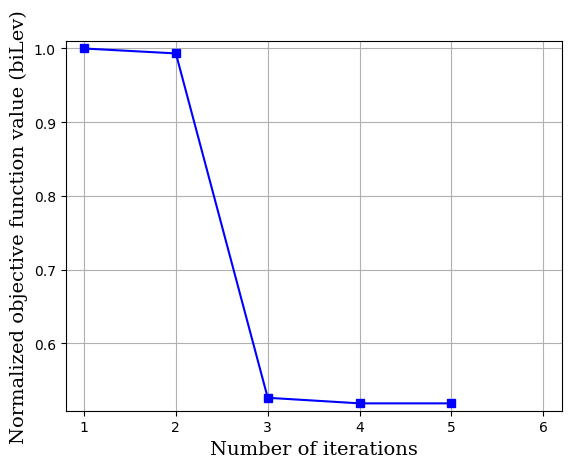

In [33]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_Anaheim.pdf")

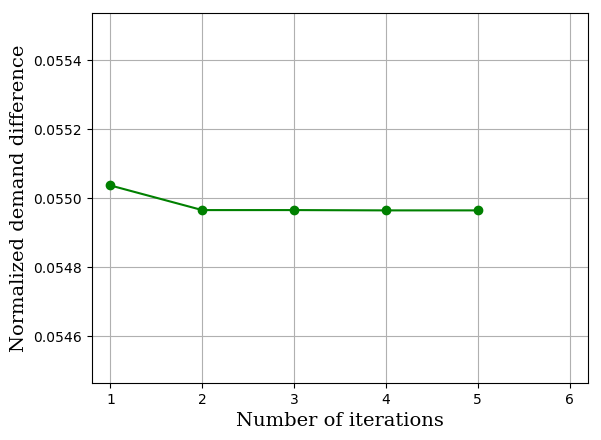

In [34]:
using PyPlot

iterNum = 1:(length(demandsDiffDictCar))

demandsDiff = map(iterNum->demandsDiffDictCar[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictCar) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Anaheim_car.pdf")

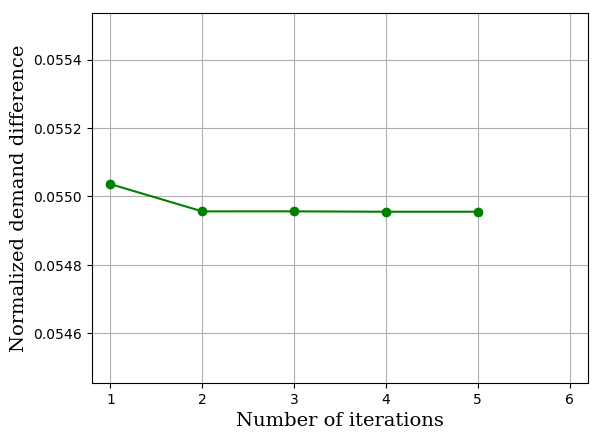

In [35]:
using PyPlot

iterNum = 1:(length(demandsDiffDictTruck))

demandsDiff = map(iterNum->demandsDiffDictTruck[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictTruck) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Anaheim_truck.pdf")

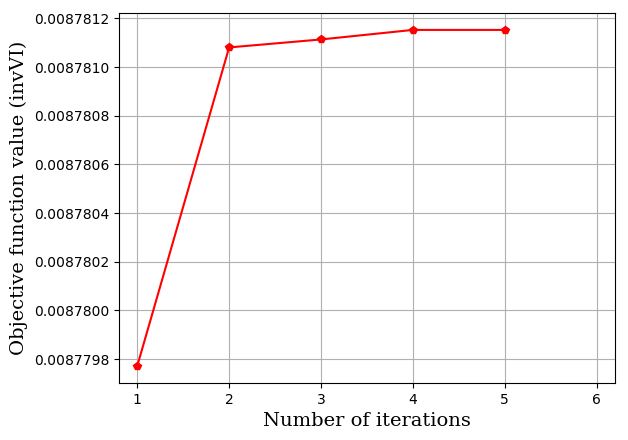

In [36]:
using PyPlot

iterNum = 1:(length(objInvVIDict))

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "p-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, length(objInvVIDict) + 1 + .2)
# ylim(0.9, 2.0)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("./results/objFun_invVI_Anaheim.pdf")

In [37]:
coeffs_dict

Dict{Any,Any} with 5 entries:
  (6,1.5,0.1,4) => [1.0,0.0055782,0.0155296,0.0197804,0.0141898,0.00560159,0.00…
  (6,1.5,0.1,3) => [1.0,0.00556798,0.0153868,0.0195546,0.0140369,0.00555287,0.0…
  (6,1.5,0.1,5) => [1.0,0.0055782,0.0155296,0.0197804,0.0141898,0.00560159,0.00…
  (6,1.5,0.1,1) => [1.0,0.0032715,0.00876444,0.011008,0.00785464,0.00309666,0.0…
  (6,1.5,0.1,2) => [1.0,0.00552416,0.0152592,0.0193905,0.0139187,0.00550606,0.0…

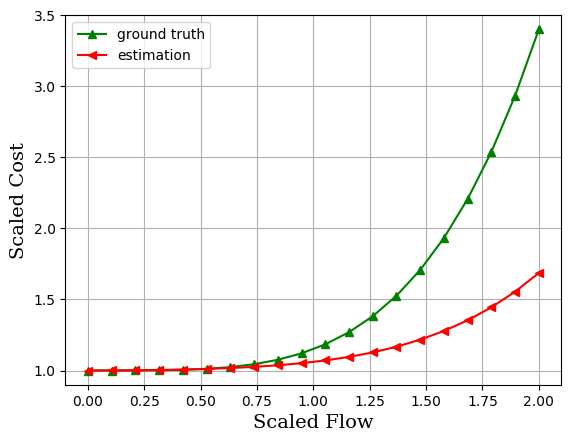

In [38]:
using PyPlot

iterN = 2

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

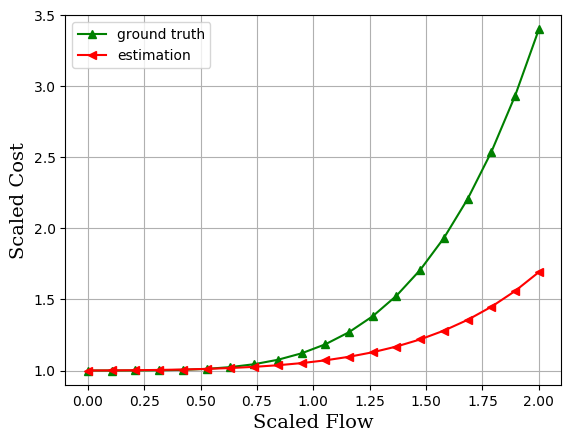

In [39]:
using PyPlot

iterN = 3

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

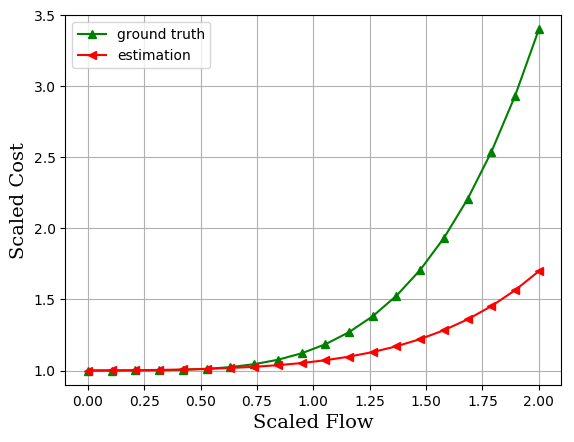

In [40]:
using PyPlot

iterN = length(coeffs_dict)

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

In [41]:
objFunDict

Dict{Any,Any} with 5 entries:
  4 => 6.0956e7
  2 => 1.16734e8
  3 => 6.18425e7
  5 => 6.0956e7
  1 => 1.17519e8

In [42]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [43]:
outfile = open("./results/demandsDiffDictCar.json", "w")

JSON.print(outfile, demandsDiffDictCar)

close(outfile)

In [44]:
outfile = open("./results/demandsDiffDictTruck.json", "w")

JSON.print(outfile, demandsDiffDictTruck)

close(outfile)

In [45]:
outfile = open("./results/objInvVIDict.json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [46]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [47]:
outfile = open("./results/demandsVecDictCar.json", "w")

JSON.print(outfile, demandsVecDictCar)

close(outfile)

In [48]:
outfile = open("./results/demandsVecDictTruck.json", "w")

JSON.print(outfile, demandsVecDictTruck)

close(outfile)

In [49]:
outfile = open("./results/demandsDictCar.json", "w")

JSON.print(outfile, demandsDictCar)

close(outfile)

In [50]:
outfile = open("./results/demandsDictTruck.json", "w")

JSON.print(outfile, demandsDictTruck)

close(outfile)

In [51]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [52]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)